In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib 
pd.options.mode.chained_assignment = None

# Dickey-Fuller test
#from statsmodels.tsa.stattools import adfuller
#from scipy.signal import hilbert  区别 from statsmodels.tsa.stattools import
from pyhht.utils import inst_freq
from pyhht import EMD

import tushare as ts
pro = ts.pro_api('9293b9b01414a95f89aa75f884c907fdc2cd24f41c8ea3de863eaa26')

import scipy.signal as signal
from scipy import fftpack
from scipy.fftpack import fft, ifft
import scipy.signal as signal
from scipy import interpolate




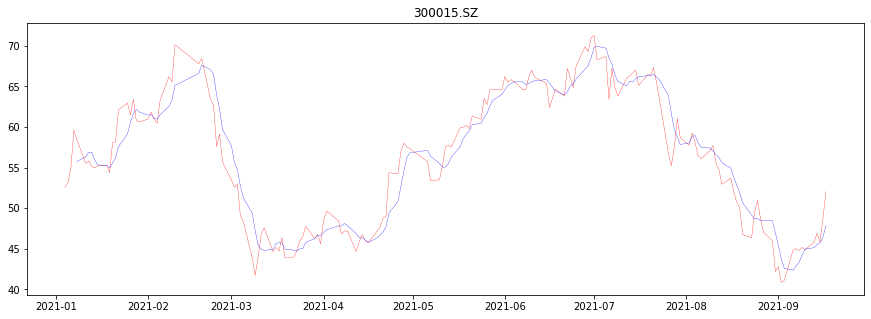

In [21]:
#复权个股日线
sd = '20210101'
ed = '20210917'

#tc = '399300.SZ'
tc = '300015.SZ'
#tc = '600438.SH'
#tc = '600036.SH'

#['600438.SS','601168.SS','600765.SS']
#'601012.SS', '600438.SS','300014.SZ','002460.SZ','600745.SS','603986.SS','603005.SS'
#,'603501.SS','601168.SS','600309.SS','002493.SZ','600176.SS','600426.SS','600989.SS','600893.SS'
#,'600760.SS','000733.SZ','600765.SS','002373.SZ','600033.SS','600036.SS'
data = ts.pro_bar(api=pro, ts_code=tc, adj='qfq', start_date=sd, end_date=ed,freq='d')  ##个股日线freq='d' 周线freq='w'

#data = pro.index_daily(ts_code=tc, adj='qfq', start_date=sd, end_date=ed)     ##指数日线
#data = pro.index_weekly(ts_code=tc, adj='qfq', start_date='20190101', end_date='20210526')    ##指数周线

data = data[::-1].reset_index(drop=True) #初始索引倒置
data['trade_date'] = pd.to_datetime(data['trade_date'],format='%Y%m%d')
data.set_index('trade_date', inplace=True)

data['w_close']=data['close'].rolling(5).mean()

plt.figure(figsize=(15, 5))
#plt.figure(figsize=(10,6), dpi=256)
plt.title(str(tc))
#plt.axhline(0, color='blue')
#plt.plot(data['pct_chg'], color="Green", linewidth=0.3, linestyle="-")
plt.plot(data['close'], color="red", linewidth=0.3, linestyle="-")
plt.plot(data['w_close'], color="blue", linewidth=0.3, linestyle="-")

In [22]:
def Forcast(data_np,predictNum) :
    #模拟通达信forcase函数
    #log.info("data_np:"+str(data_np))
    
    # talib.MA MA_Type: 0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA) 

    ma = talib.MA(data_np,predictNum,0)
    
    #log.info("sma:"+str(sma))
    
    wma = talib.WMA(data_np,predictNum) 
    
    #log.info("wma:"+str(wma))

    # FORCAST(X,N):=3*wma(X,N)-2*ma(X,N)
    fp =  3*wma - 2*ma 
    
    #log.info("fp:"+str(fp))

    return  fp

144


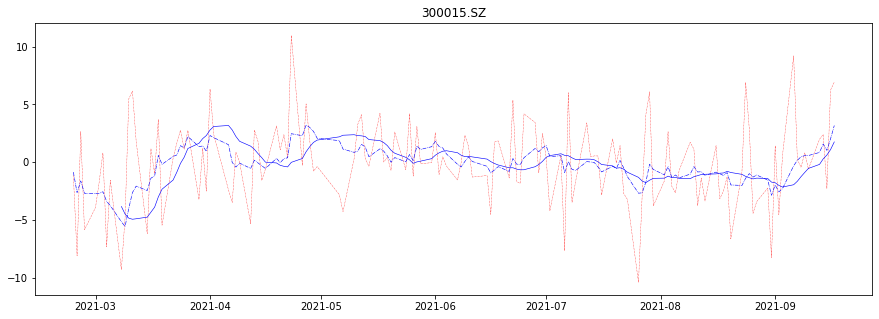

In [23]:
data['rec_t'] = Forcast(np.array(data['pct_chg'].values),21)
data['em_rec'] = Forcast(np.array(data['rec_t'].values),21)

df = data[-144:]
#df = data.tail(144)
print(len(df))
#df['f_close'] = forcast(df['close'],21)
#df['f_close'] = df['close'].ewm(span=3).mean()
df['w_pct_chg'] = df['pct_chg'].rolling(5).mean()

#df['vol_chg'] = (df['amount']/df['amount'].shift(1) - 1) 


plt.figure(figsize=(15, 5))
#plt.figure(figsize=(10,6), dpi=256)
plt.title(str(tc))
#plt.axhline(0, color='blue')

plt.plot(df['pct_chg'], color="red", linewidth=0.3, linestyle="dashdot")
 
 

plt.plot(df['rec_t'], color="blue", linewidth=0.6, linestyle="dashdot")
 
plt.plot(df['em_rec'], color="blue", linewidth=0.6, linestyle="-")
 


当前极值点个数： 49
当前极值点个数： 50
当前极值点个数： 51
当前极值点个数： 51
当前极值点个数： 50
当前极值点个数： 51
当前极值点个数： 51
当前极值点个数： 51
当前极值点个数： 50
当前极值点个数： 51
当前极值点个数： 20
当前极值点个数： 19
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 22
当前极值点个数： 21
当前极值点个数： 9
当前极值点个数： 9
当前极值点个数： 9
当前极值点个数： 8
当前极值点个数： 9
当前极值点个数： 8
当前极值点个数： 3
当前极值点个数： 4
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 1
当前极值点个数： 1
当前极值点个数： 1
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值点个数： 1
当前极值点个数： 0
当前极值

No handles with labels found to put in legend.


Text(0, 0.5, 'Amplitude')

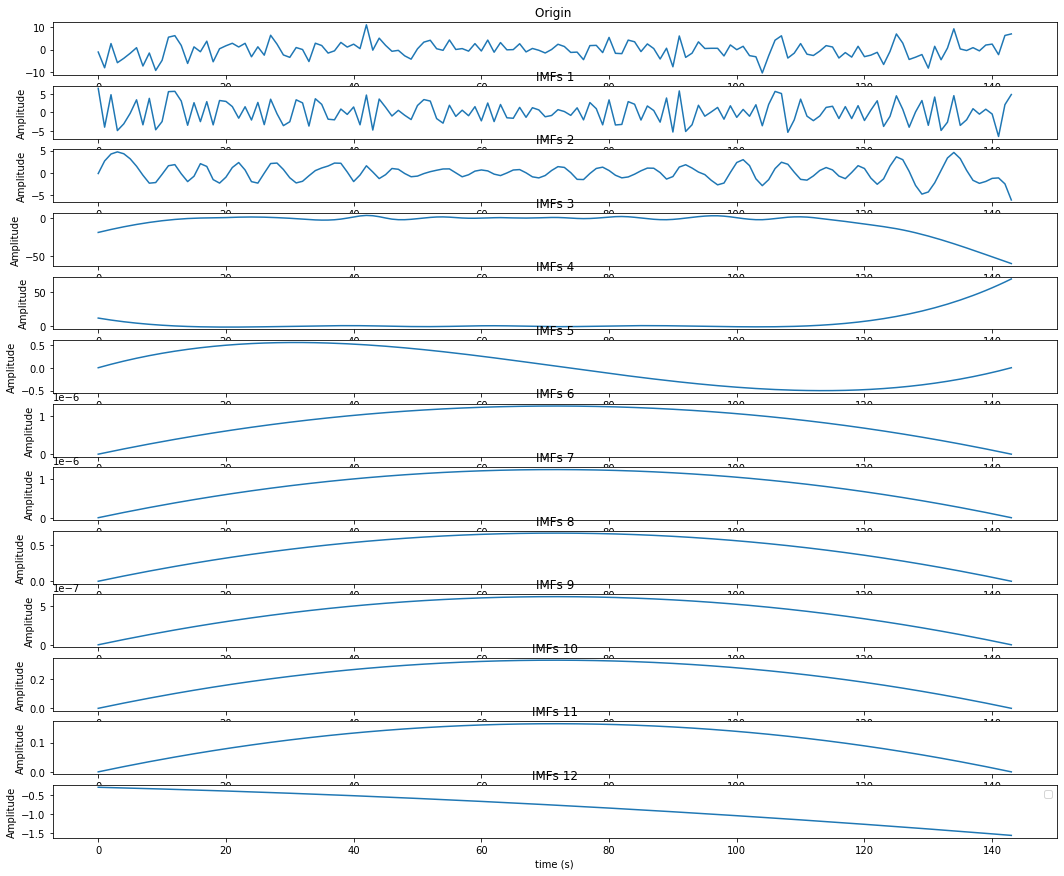

In [24]:
# 判定当前的时间序列是否是单调序列
def ismonotonic(x):
    max_peaks = signal.argrelextrema(x, np.greater)[0]
    min_peaks = signal.argrelextrema(x, np.less)[0]
    all_num = len(max_peaks) + len(min_peaks)
    if all_num > 0:
        return False
    else:
        return True


# 寻找当前时间序列的极值点
def findpeaks(x):
    return signal.argrelextrema(x, np.greater)[0]

# 判断当前的序列是否为 IMF 序列
def isImf(x):
    N = np.size(x)
    pass_zero = np.sum(x[0:N - 2] * x[1:N - 1] < 0)  # 过零点的个数
    peaks_num = np.size(findpeaks(x)) + np.size(findpeaks(-x))  # 极值点的个数
    if abs(pass_zero - peaks_num) > 1:
        return False
    else:
        return True


# 获取当前样条曲线
def getspline(x):
    N = np.size(x)
    peaks = findpeaks(x)
    print ('当前极值点个数：', len(peaks))
    if (len(peaks) <= 3):
        if (len(peaks) < 2):
            peaks = np.concatenate(([0], peaks))
            peaks = np.concatenate((peaks, [N - 1]))  # 这里是为了防止样条次数不够，无法插值的情况
        t = interpolate.splrep(peaks, y=x[peaks], w=None, xb=None, xe=None, k=len(peaks) - 1)
        return interpolate.splev(np.arange(N), t)
    t = interpolate.splrep(peaks, y=x[peaks])
    return interpolate.splev(np.arange(N), t)


# 经验模态分解方法
def emd(x):
    imf=[]
    #k=0
    while not ismonotonic(x):
        x1=x
        sd=np.inf
        #print(1)
        i = 0
        while sd>0.1 or  (not isImf(x1)):
            i += 1
            if i>20 :
                break
            #print(2)
            s1=getspline(x1)
            s2=-getspline(-1*x1)
            x2=x1-(s1+s2)/2
            sd=np.sum((x1-x2)**2)/np.sum(x1**2)
            x1=x2
        
        imf.append(x1)
        #k += 1
        x=x-x1
        #if k>3 :
            #break       
    imf.append(x)
    return imf



dx = np.array(df['pct_chg'])
IMFs=emd(dx)

n = len(IMFs)+1
print(n)
# 原始信号
plt.figure(figsize = (18,15))
plt.subplot(n, 1, 1)
plt.plot(dx, label='Origin')
plt.title("Origin ")

# 若干条IMFs曲线
for i in range(0,len(IMFs)):
    plt.subplot(n, 1, i+2)
    plt.plot(IMFs[i])
    plt.ylabel('Amplitude')
    plt.title("IMFs "+str(i+1))

plt.legend()
plt.xlabel('time (s)')
plt.ylabel('Amplitude')   

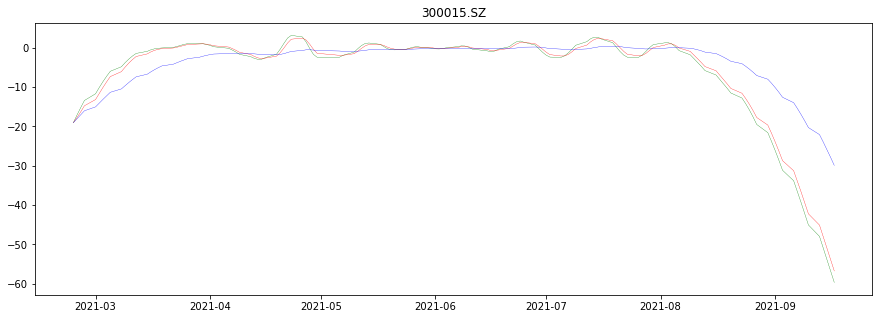

In [25]:
 #------------------------------EMA多头判断------------------------------------------------------------------
#print( IMFs[2])
dhf = df
dhf['emd_price'] = IMFs[2]
dhf['w_emd_price']=dhf['emd_price'].rolling(5).mean()

dhf['ema5']  = dhf['emd_price'].ewm(span=3).mean()
dhf['ema10']  = dhf['emd_price'].ewm(span=10).mean()
dhf['ema20']  = dhf['emd_price'].ewm(span=30).mean()
dhf['ema60']  = dhf['emd_price'].ewm(span=60).mean()

#---------------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
plt.title(str(tc))

plt.plot(df['emd_price'], color="green", linewidth=0.3, linestyle="-")
 
plt.plot(df['ema5'], color="red", linewidth=0.3, linestyle="-")
plt.plot(df['ema20'], color = "blue",  linewidth=0.3, linestyle="-")

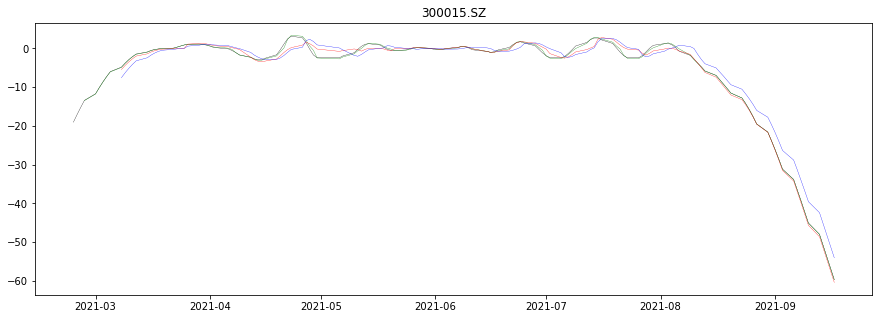

In [26]:
def ssa(series, windowLen , pcn  ):
    seriesLen = len(series)
    K = seriesLen - windowLen + 1
    X = np.zeros((windowLen, K))
    for i in range(K):
        X[:, i] = series[i:i + windowLen]
    
    U, sigma, VT = np.linalg.svd(X, full_matrices=False)

    for i in range(VT.shape[0]):
        VT[i, :] *= sigma[i]
    A = VT

    rec = np.zeros((windowLen, seriesLen))
    for i in range(windowLen):
        for j in range(windowLen-1):
            for m in range(j+1):
                rec[i, j] += A[i, j-m] * U[m, i]
            rec[i, j] /= (j+1)
        for j in range(windowLen-1, seriesLen - windowLen + 1):
            for m in range(windowLen):
                rec[i, j] += A[i, j-m] * U[m, i]
            rec[i, j] /= windowLen
        for j in range(seriesLen - windowLen + 1, seriesLen):
            for m in range(j-seriesLen+windowLen, windowLen):
                rec[i, j] += A[i, j - m] * U[m, i]
            rec[i, j] /= (seriesLen - j)
    
    result = np.sum(rec[:pcn], axis=0)
    return result[-1]
    #return result
#--------------------------------------------------------------------------------------------------------  
pcn = 1
fwl = 2
swl = 5
dwl = 3
#---------------------------------三SSA-------------------------------------------------
dhf['f_ssa'] = dhf['emd_price'].rolling(2*fwl).apply(ssa,args = (fwl,pcn),raw = True) 
dhf['s_ssa'] = dhf['emd_price'].rolling(2*swl).apply(ssa,args = (swl,pcn),raw = True) 
dhf['w_ssa'] = dhf['w_emd_price'].rolling(2*dwl).apply(ssa,args = (dwl,pcn),raw = True) 
#---------------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
plt.title(str(tc))

plt.plot(dhf['emd_price'], color="black", linewidth=0.3, linestyle="-")
plt.plot(dhf['f_ssa'], color="green", linewidth=0.3, linestyle="-")
plt.plot(dhf['s_ssa'], color="red", linewidth=0.3, linestyle="-")
plt.plot(dhf['w_ssa'], color = "blue",  linewidth=0.3, linestyle="-")

策略收益率：0.6891445209058524
基准收益率：-0.178375095353133


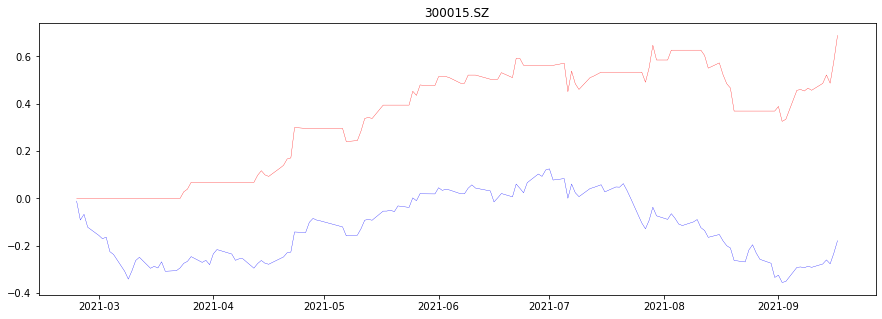

In [27]:
#---------------------------------买卖点策略-------------------------------------------------
#DataFrame.diff(periods=1, axis=0) ; periods：移动的幅度，int类型，默认值为1;
# axis：移动的方向，{0 or ‘index’, 1 or ‘columns’}，
# 如果为0或者’index’，则上下移动，如果为1或者’columns’，则左右移动。
dhf['dfe'] = dhf['f_ssa']-dhf['ema5']
dhf['dtf'] = dhf['f_ssa']-dhf['f_ssa'].shift(1)
dhf['dts'] = dhf['s_ssa']-dhf['s_ssa'].shift(1) 
dhf['dtw'] = dhf['w_ssa']-dhf['w_ssa'].shift(1) 

#df['ddx'] =  (df['dtf']>0.0000)  & (df['dts']>0) & (df['dtw']>0.0000)  
#dhf['ddx'] =  (dhf['dtf']>0.0000)  & (dhf['dtw']>0) & (dhf['dfe']>0.0000) 
dhf['ddx'] =  dhf['dtf'] > dhf['dts'] 
#print(df['ddx'])

#---------------------------------回测收益-------------------------------------------------
dhf['res'] = np.select([dhf['ddx'] > 0],[dhf['close']],default = np.nan)  #获取快慢SSA >0的时序
dhf['attack'] = np.select([dhf['ddx'] > 0],[1],default = 0)#获取“双SSA斜率差 >0策略”的时序的触发信号

bs = np.array(dhf['attack'])

#print("买卖信号A:"+str(bs[-1]))

dhf['buy'] = dhf['attack'].shift(1) #下移一行买入信号
bs2 = np.array(dhf['buy'])
#print("买卖信号B:"+str(bs2[-1]))
#print(np.array(df['buy']))

dhf['base_profit'] = 1+0.01*dhf['pct_chg'].fillna(0) #计算基准每日收益
dhf['prod_base_profit'] = dhf['base_profit'].cumprod()-1 #计算基准每日收益累乘
dhf['profit'] = np.select([dhf['buy'] == 1],[dhf['base_profit']],default = 1) #计算策略每日收益
dhf['profit'] = dhf['profit'].fillna(0)
#print(np.array(data['profit']))

dhf['prod_profit'] = dhf['profit'].cumprod()-1#计算策略每日收益累乘
dhf['max_profit'] = dhf['prod_profit'].max()

plt.figure(figsize=(15, 5))
plt.title(str(tc))

plt.plot(dhf['prod_profit'], color="red", linewidth=0.3, linestyle="-")
plt.plot(dhf['prod_base_profit'], color = "blue",  linewidth=0.3, linestyle="-")

print("策略收益率："+str(np.array(dhf['prod_profit'])[-1])) 
print("基准收益率："+str(np.array(dhf['prod_base_profit'])[-1]))

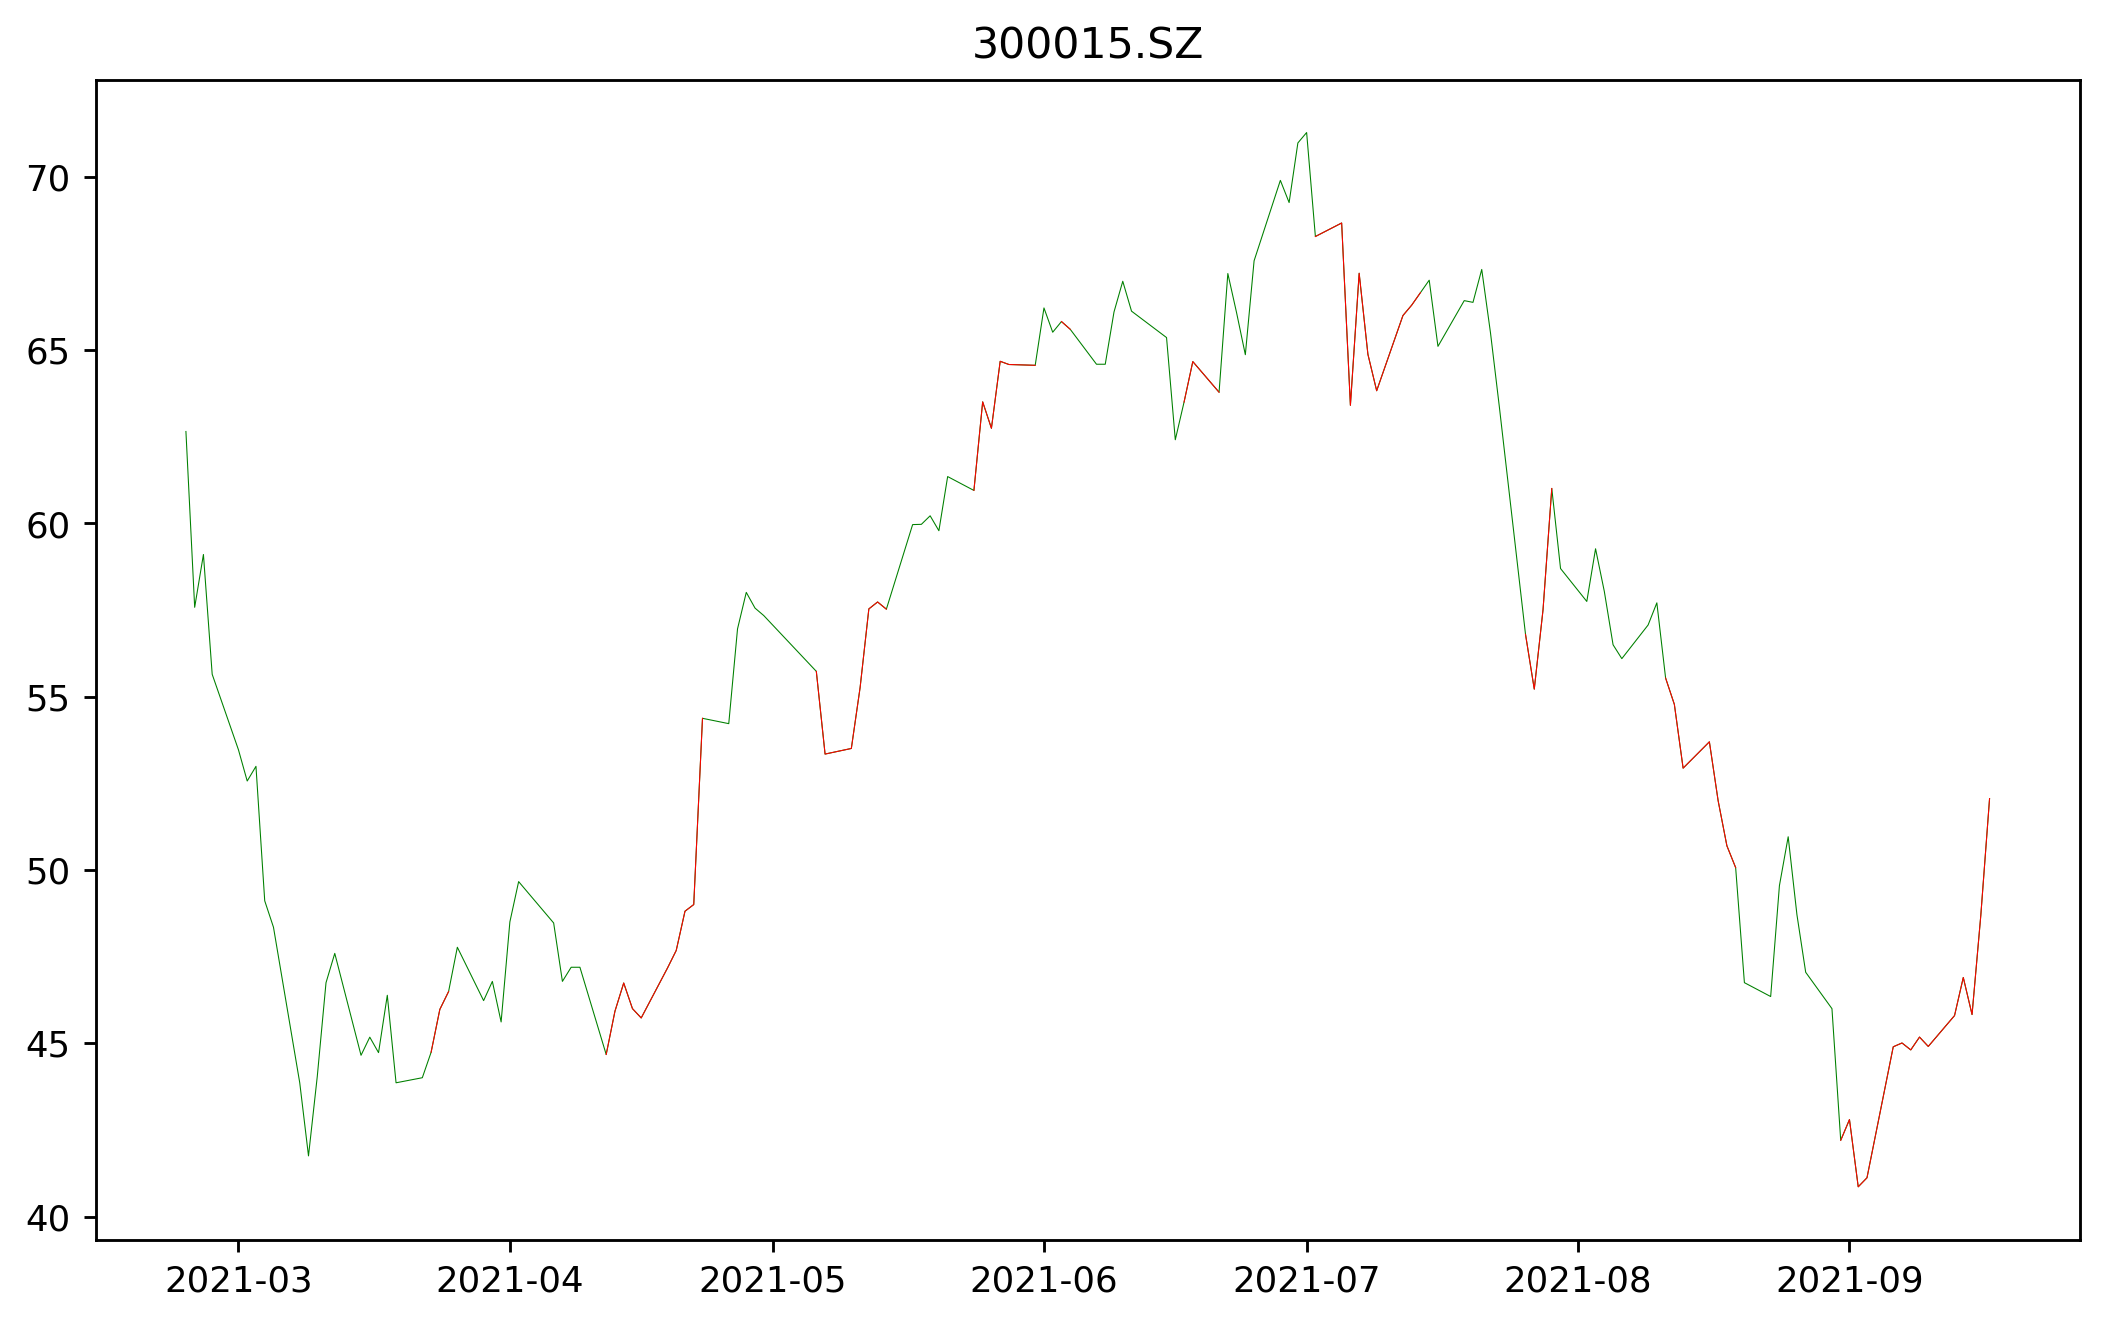

In [28]:
plt.figure(figsize=(10,6), dpi=256)
#plt.axhline(0, linewidth=0.6, linestyle='--', color='red') 
#plt.axvline(0, linestyle='--', color='red'
#plt.plot(returns, color="blue",  linewidth=0.2, linestyle="-")

plt.title(str(tc))
plt.plot(dhf['close'], color="green", linewidth=0.3, linestyle="-")
plt.plot(dhf['res'], color = "red",  linewidth=0.3, linestyle="-")
#plt.plot(data['s_ssa'], color="blue",  linewidth=0.2, linestyle="-")